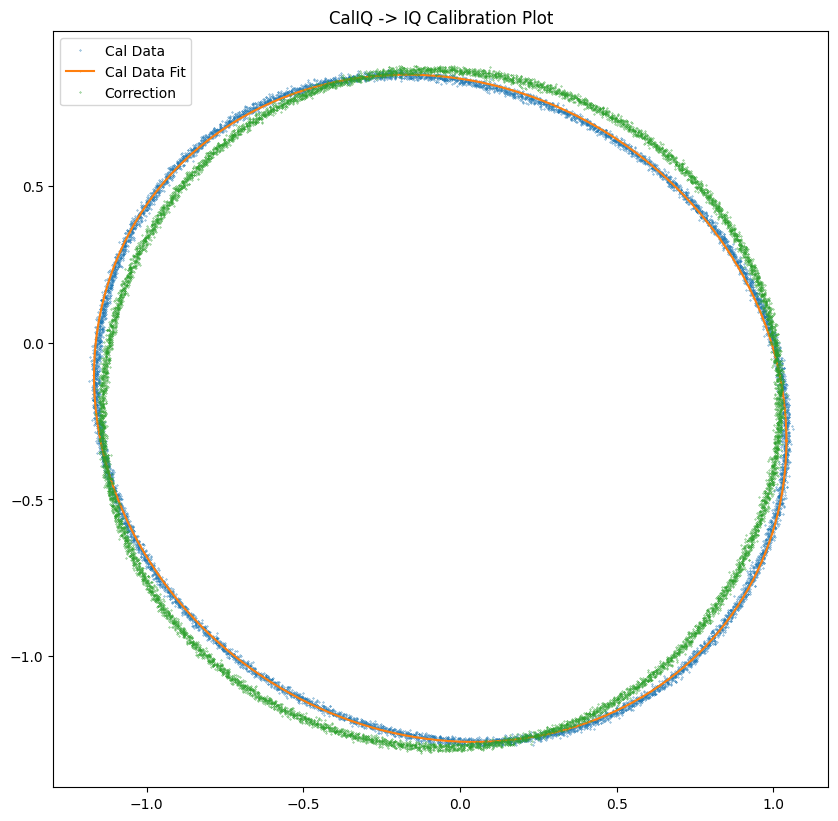

In [1]:

import numpy as np
import globvar
import os
from datetime import date


from datawrapper import LoadSpectraData, FindMixerCalibrationData, MixerCalibrationData, FindIQCalibrationData, IQCalibrationData
from utilities import CorrectionLog, Display, SumStringsToStringArray
from caliq import CalIQ
from backgroundcalibration import BackgroundCalibration

home = '/home/alessandro/Lab/Data/'

plot = 1
freq_num = 3
calibration_path = home + 'Calibration/'
mixer_calibrations_path = calibration_path + 'MixerCalibration/'
iq_calibrations_path = calibration_path + 'IQCalibration/'
log_path = home + '/Logs/Frequency_' + str(freq_num) + 'Output.log'

analysis_run = 1
globvar.logpath = home + 'log'

today = date.today()
logpath = globvar.logpath + '_run' + str(analysis_run) +'_' + str(today) + '.log'
# Useful while debugging the code, so we don't keep writing on the same log file in different trials
if os.path.isfile(logpath):
    os.remove(logpath)

# Array of data to be written on the log file
logdata = []

# Load spectra from channel data. Note that the output is an array of matrices, each containing data for 1 of the channels
spectra_data, numchannels, num_events, event_length = LoadSpectraData(freq_num)

logdata.append(numchannels)
logdata.append(num_events)
logdata.append(event_length)

#--------------------------------- Mixer Calibration ------------------------------------------
#-------------------------------------- [START] -----------------------------------------------

# Retrieve the ellipse folder nearest to the working frequency
mixer_calibration_folder = FindMixerCalibrationData(freq_num, mixer_calibrations_path)
mixer_calibration_data_path = mixer_calibrations_path + mixer_calibration_folder + '/'

logdata.append(mixer_calibration_data_path)

# Retrieve ellipse data from the folder we just found
# Note that 'MixerCalibrationData' returns the frequency window and the IQ matrix. The IQ matrix is the second of the objects returned.
_, mixer_calibration_data = MixerCalibrationData(mixer_calibration_data_path)

# Store the mixer correction, computed via IQCalibration function starting from the mixer_calibration_data
mixer = CalIQ(mixer_calibration_data, ifplot = plot)

logdata.extend([mixer.AI, mixer.AQ, mixer.I0, mixer.Q0, mixer.Amp])


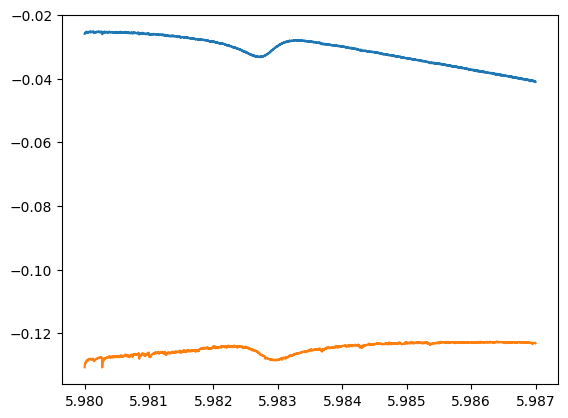

In [19]:
from matplotlib import pyplot as plt

plt.plot(data[:, 0], data[:, 1])
plt.plot(data[:, 0], data[:, 2])

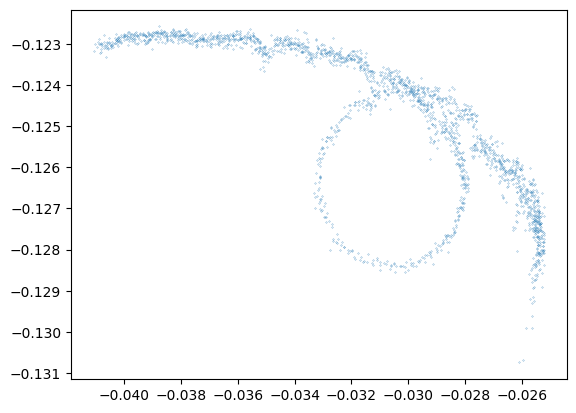

In [23]:
plt.plot(data[:, 1], data[:, 2], '.', markersize = .4)

In [ ]:
from correctiqbackground import CorrectIQBackground

s21corr = 